In [1]:
# Data analysis

import pandas as pd
import numpy as np
import random as rnd
import tensorflow 

# Visualisation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scaling and dividing into sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix


In [4]:
df = pd.read_csv("kc_house_data.csv")
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

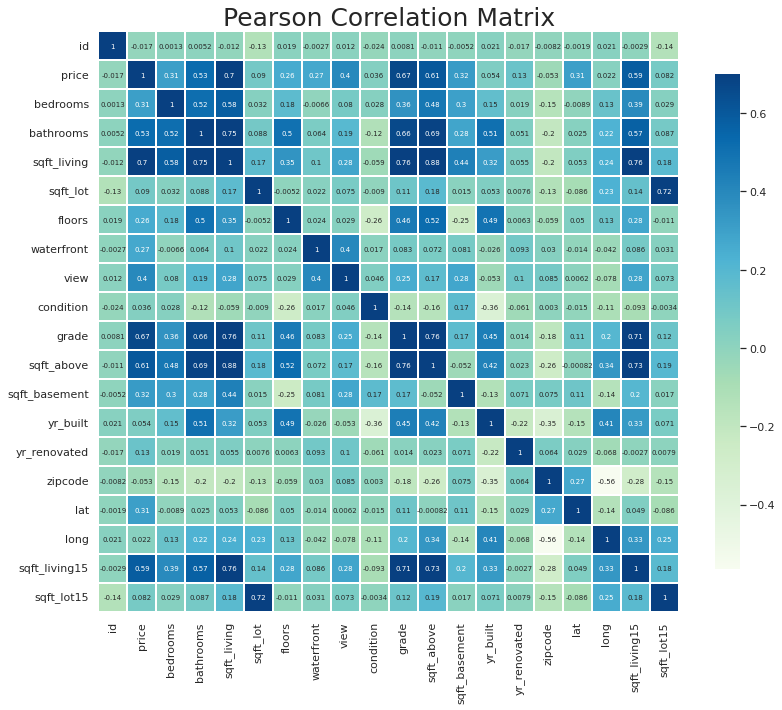

In [9]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [10]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

In [11]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


In [12]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 21)
(6484, 21)
(15129,)
(6484,)


In [15]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [16]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [17]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 423630372864.0000 - val_loss: 433033674752.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 422792429568.0000 - val_loss: 429938311168.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 409704235008.0000 - val_loss: 398761492480.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 342632660992.0000 - val_loss: 285708582912.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 199235338240.0000 - val_loss: 138680614912.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 111018180608.0000 - val_loss: 108932661248.0000
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 102432579584.0000 - val_loss: 107104362496.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 100910039040.0000 - val_loss: 105479929856.0000
Epoch 9/400
119/

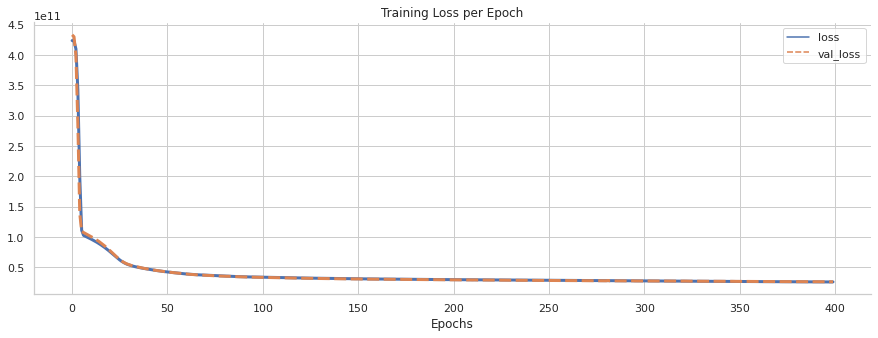

In [18]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [19]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 1s 2ms/step
MAE:  100102.12372402259
MSE:  25990689673.34749
RMSE:  161216.28228360647
Variance Regression Score:  0.8147281766566971


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [21]:
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 21))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
zipcode          9.817800e+04
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64
1/1 [==============================] - 0s 29ms/step

Prediction Price: 264484.6

Original Price: 221900.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

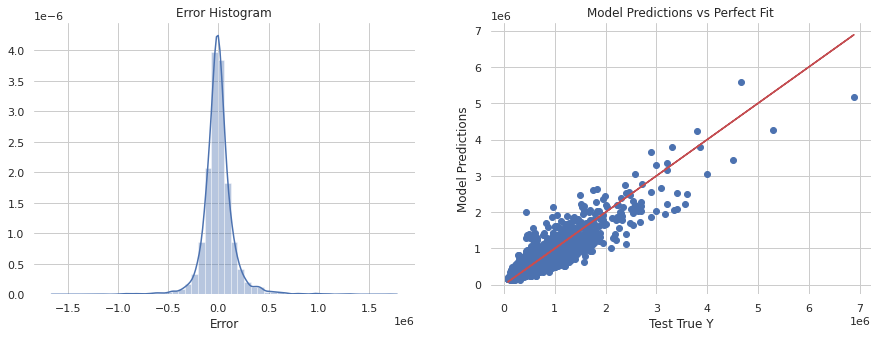

In [22]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')
